In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import vaex
from matplotlib import pyplot as plt


from shapely.geometry import Point
from shapely.ops import unary_union

import statsmodels.api as sm
import matplotlib.colors as colors

from datetime import datetime
from typing import Any, Dict, Tuple

pd.set_option('display.max_columns', None)

In [16]:
def read_shp(zipfile: str, crs: str = None, to_crs: str = None) -> gpd.GeoDataFrame:
    """Le Arquivos shapefiles zipados do GeoSampa
    """
    file = "zip://"+zipfile
    gdf = gpd.read_file(file)
    # Set CRS
    if crs:
        gdf.crs = crs
    if to_crs:
        # Convert CRS
        gdf.to_crs(to_crs, inplace=True)
    return gdf

path_line = 'data/SAD69-96_SHP_linhametro.zip!SAD69-96_SHP_linhametro/SAD69-96_SHP_linhametro_line.shp'
to_crs = "EPSG:22523"
crs_sad69 = "EPSG:5533"
# GeoSampaData
df_metro_line = read_shp(path_line, crs_sad69, to_crs)
df_metro_line

,lmt_nome,lmt_linom,lmt_empres,lmt_linha,geometry
0,AZUL,LINHA 1 - AZUL,METRO,1,"LINESTRING (336329.383 7402468.324, 336217.833..."
1,VERDE,LINHA 2 - VERDE,METRO,2,"LINESTRING (327429.711 7394979.265, 327499.366..."
2,VERMELHA,LINHA 3 - VERMELHA,METRO,3,"LINESTRING (329787.219 7397277.354, 329874.547..."
3,LILAS,LINHA 5 - LILÁS,METRO,5,"LINESTRING (333655.077 7389934.121, 333626.878..."
4,PRATA,LINHA 15 - PRATA,METRO,15,"LINESTRING (338410.393 7390860.260, 338439.424..."
5,AMARELA,LINHA 4 - AMARELA,VIAQUATRO,4,"LINESTRING (333174.955 7396183.642, 333129.298..."


In [4]:
EPSG = 31983

def create_gis_point(df_raw: pd.DataFrame, dict_gis: Dict) -> gpd.GeoDataFrame:
    df_raw.dropna(subset=dict_gis["loc_domicilio"], inplace=True)
    for k, v in dict_gis.items():
        df_raw[k] = gpd.points_from_xy(df_raw[v[0]], df_raw[v[1]])
    if df_raw.dtypes[df_raw.dtypes == 'geometry'].shape[0] > 1:
        gdf = gpd.GeoDataFrame(df_raw,  geometry='loc_domicilio', crs = "EPSG:22523")
    else:
        gdf = gpd.GeoDataFrame(df_raw, crs = "EPSG:22523")
    return gdf

## Cores

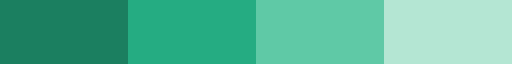

In [5]:
verde_esmeralda = {
    "verde_escuro": "#1B7F60",       # mais fechado, ótimo para contrastes ou texto
    "verde_principal": "#25AC82",   # o tom original
    "verde_claro": "#5FC9A6",       # tom mais suave para preenchimentos
    "verde_clarissimo": "#B4E6D3",  # bem suave, bom para fundo
}

cmap_verde = colors.ListedColormap(list(verde_esmeralda.values()))
cmap_verde

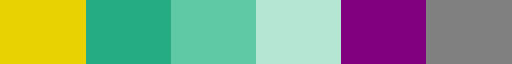

In [7]:
esmeralda_amarelo_c6 = {
    "amarelo": '#E8D202',
    "verde_principal": "#25AC82",
    "verde_claro": "#5FC9A6",
    "verde_clarissimo": "#B4E6D3",
    "purple": "purple",
    "grey": "grey",
}

cmap_esmeralda_amarelo_c6 = colors.ListedColormap(list(esmeralda_amarelo_c6.values()))
cmap_esmeralda_amarelo_c6

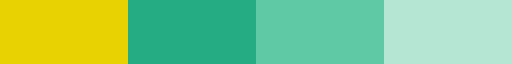

In [10]:
esmeralda_amarelo_c4 = {
    "amarelo": '#E8D202',
    "verde_principal": "#25AC82",
    "verde_claro": "#5FC9A6",
    "verde_clarissimo": "#B4E6D3",
}

cmap_esmeralda_amarelo_c4 = colors.ListedColormap(list(esmeralda_amarelo_c4.values()))
cmap_esmeralda_amarelo_c4

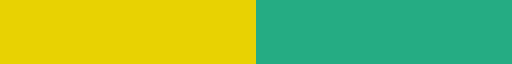

In [11]:
esmeralda_amarelo_c2 = {
    "amarelo": '#E8D202',
    "verde_principal": "#25AC82",
}

cmap_esmeralda_amarelo_c2 = colors.ListedColormap(list(esmeralda_amarelo_c2.values()))
cmap_esmeralda_amarelo_c2

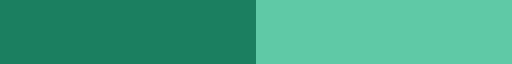

In [12]:
verde_esmeralda_2 = {
    "verde_escuro": "#1B7F60",
    "verde_claro": "#5FC9A6",
}

cmap_verde_2 = colors.ListedColormap(list(verde_esmeralda_2.values()))
cmap_verde_2

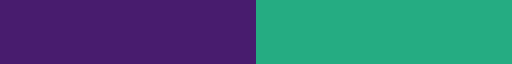

In [13]:
esmeralda_roxo = {
    "roxo": "#481C6E",
    "verde_principal": "#25AC82",
}

cmap_esmeralda_roxo = colors.ListedColormap(list(esmeralda_roxo.values()))
cmap_esmeralda_roxo

In [17]:
gpd_zona_fiscal = gpd.read_file("data/SIRGAS_SHP_zonafiscal.shp")
gpd_distritos = gpd.read_file("data/SIRGAS_SHP_distrito.shp")

In [18]:
gpd_zona_fiscal['zf_sigla_eng'] = gpd_zona_fiscal.zf_sigla.map({
    'ZF-4': 'TZ-4',
    'ZF-3': 'TZ-3',
    'ZF-2': 'TZ-2',
    'ZF-1': 'TZ-1',
})

In [19]:
parameters = catalog.load("parameters")
subways_07e17 = parameters['features']['did']['subway']['entre_07e17']
subways_17e23 = parameters['features']['did']['subway']['entre_17e23']
subways_07e17_all = subways_07e17['central'] + subways_07e17['periferia']
subways_17e23_all = subways_17e23['central'] + subways_17e23['periferia']

gdf_metro_open = catalog.load("metro_final")
gdf_metro_open_iptu = catalog.load("metro_final")

df_quadras_results = gpd.read_file("data/quadras_classificadas.shp")
df_quadras_results['ds_groups'] = df_quadras_results['groups'].map({'1': 'Peripheral Group', '2': 'Central Group'})

2025-09-13 22:53:19,953 - kedro.io.data_catalog - INFO - Loading data from `parameters` (MemoryDataSet)...
2025-09-13 22:53:19,956 - kedro.io.data_catalog - INFO - Loading data from `metro_final` (GeoJSONDataSet)...
2025-09-13 22:53:20,020 - kedro.io.data_catalog - INFO - Loading data from `metro_final` (GeoJSONDataSet)...


In [20]:
gdf_metro_open['entre_07e17'] = gdf_metro_open.emt_nome.isin(subways_07e17_all)
gdf_metro_open['entre_17e23'] = gdf_metro_open.emt_nome.isin(subways_17e23_all)

gdf_metro_open['entre_07e17_central'] = gdf_metro_open.emt_nome.isin(subways_07e17['central'])
gdf_metro_open['entre_17e23_central'] = gdf_metro_open.emt_nome.isin(subways_17e23['central'])

gdf_metro_open['entre_07e17_periferia'] = gdf_metro_open.emt_nome.isin(subways_07e17['periferia'])
gdf_metro_open['entre_17e23_periferia'] = gdf_metro_open.emt_nome.isin(subways_17e23['periferia'])

In [21]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

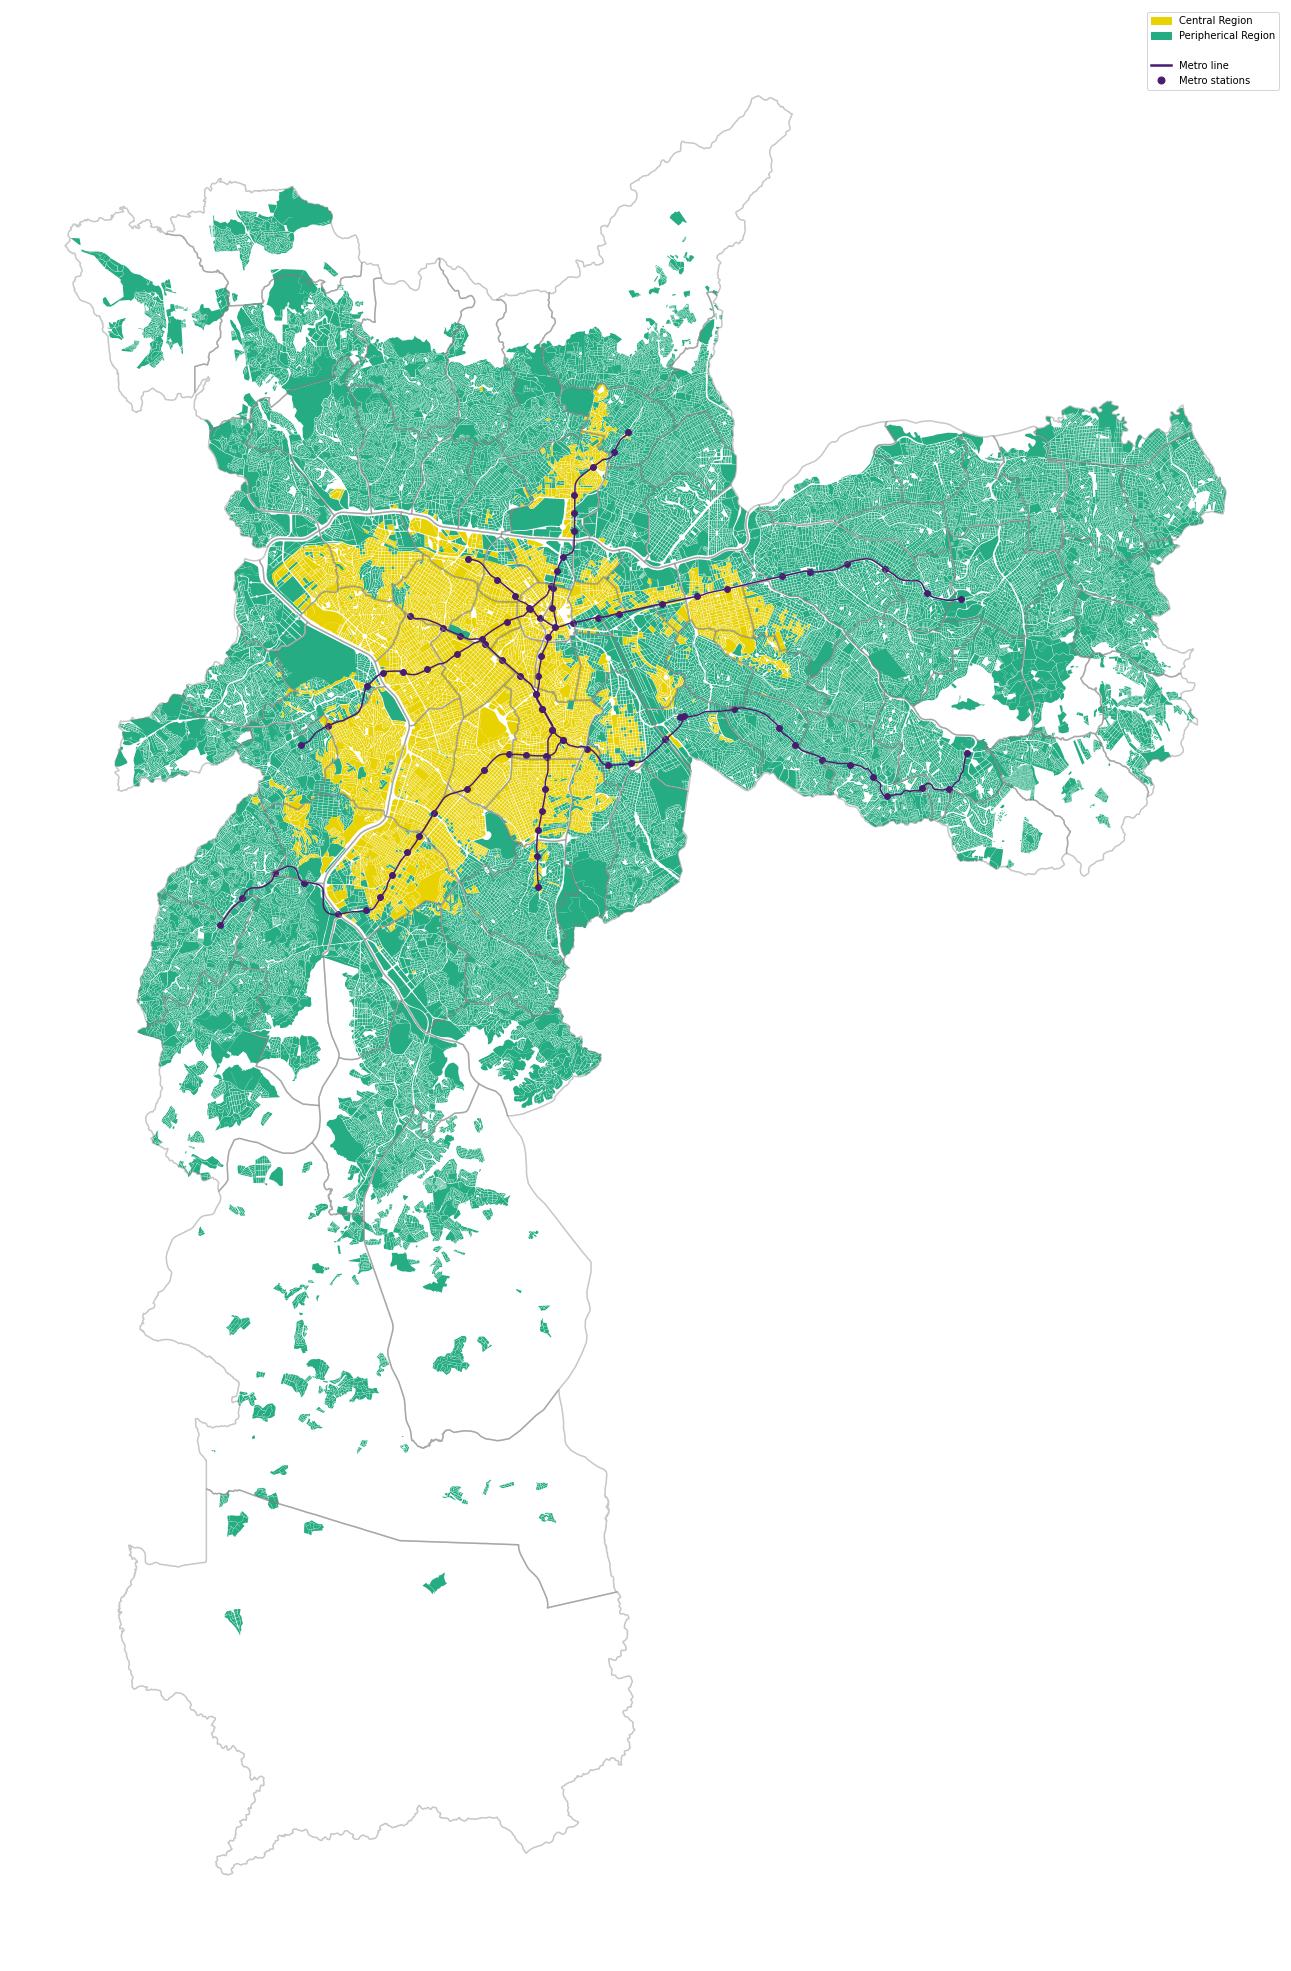

In [22]:
t = 3
fig, ax = plt.subplots(figsize=(10*t, 12*t))
ax = gpd_distritos.boundary.plot(color='grey', ax=ax, alpha=.25)
ax = df_quadras_results.sample(frac=1).plot(column="ds_groups", legend = True, cmap=cmap_esmeralda_amarelo_c2, ax=ax)

# Second layer without legend
gpd_distritos.boundary.plot(color='grey', ax=ax, alpha=.25)
df_metro_line.plot(ax=ax,
    color="#481C6E",
    linewidth=1.5,
    label="Metro line"
)
gdf_metro_open.plot(ax=ax, color="#481C6E", markersize=35)


patches = [
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[0], label='Central Region'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[1], label='Peripherical Region'),
    mpatches.Patch(color='white', label=' '),
    mlines.Line2D([], [], color="#481C6E", linewidth=2.5, label="Metro line"),
    mlines.Line2D([], [], color="#481C6E", marker="o", linestyle="None", markersize=7, label="Metro stations"),
]
ax.legend(handles=patches, loc='upper right')

# Background
ax.axis('off')
plt.savefig('figs/map_sp_quadras_gini.tif', dpi=500, bbox_inches="tight")
plt.show()

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from contextlib import contextmanager

MM_TO_IN = 1 / 25.4  # millimetres → inches (Matplotlib uses inches)

# ------------------------------
# 1. Context manager
# ------------------------------
@contextmanager
def elsevier_figure(width_mm: int = 190, height_mm: int = 240, dpi: int = 500):
    """Yield a Matplotlib (fig, ax) pair pre‑configured for Elsevier."""
    import scienceplots
    plt.style.use(["science", "no-latex"])
    mpl.rcParams.update({
        "font.size": 7,            # ≥ 7 pt in print
        "axes.linewidth": 0.4,
        "lines.linewidth": 1.0,
        "legend.fontsize": 7,
        "savefig.dpi": dpi,        # raster dpi when savefig called
        "figure.dpi": 100,         # screen preview (does not affect file)
        "pdf.fonttype": 42,        # embed TrueType fonts (required)
        "ps.fonttype": 42,
    })

    fig, ax = plt.subplots(figsize=(width_mm * MM_TO_IN,
                                    height_mm * MM_TO_IN))
    yield fig, ax
    plt.close(fig)


def make_elsevier_map(filename_base: str = "Fig1_map", dpi: int = 500):
    """Create both PDF (vector) and LZW‑compressed TIFF (raster) files."""
    with elsevier_figure(dpi=dpi) as (fig, ax):
        # --- Base layers ---
        gpd_distritos.boundary.plot(color="grey", ax=ax, alpha=0.25,
                                    linewidth=0.4)

        # Shuffle order to minimise over‑plotting bias
        df_quadras_results.sample(frac=1).plot(
            column="ds_groups",
            legend=False,   # Custom legend below
            cmap=cmap_esmeralda_amarelo_c2,
            ax=ax,
            linewidth=0.0,
        )
        # Re‑plot boundary on top for crisp edges
        gpd_distritos.boundary.plot(color="grey", ax=ax, alpha=0.25,
                                    linewidth=0.4)
        # Metro lines & stations
        df_metro_line.plot(ax=ax, color="#481C6E", linewidth=1.0, label="Metro line")
        gdf_metro_open.plot(ax=ax, color="#481C6E", markersize=15, label="Metro stations")

        # --- Legend (manual, Elsevier‑compliant) ---
        import matplotlib.patches as mpatches
        import matplotlib.lines as mlines

        patches = [
            mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[0], label="Central Group"),
            mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[1], label="Peripheral Group"),
            mpatches.Patch(color="white", label=" "),  # spacer row
            mlines.Line2D([], [], color="#481C6E", linewidth=1.0, label="Metro line"),
            mlines.Line2D([], [], color="#481C6E", marker="o", linestyle="None",
                           markersize=5, label="Metro stations"),
        ]
        ax.legend(handles=patches, loc="upper right")

        # Final touches
        ax.axis("off")

        # --- Export ---
        fig.savefig(f"{filename_base}.tif", bbox_inches="tight", format="tiff",
                    dpi=dpi, pil_kwargs={"compression": "tiff_lzw"})


# make_elsevier_map()

In [24]:
@contextmanager
def elsevier_figure(width_mm: int = 190, height_mm: int = 240, dpi: int = 500):
    """Yield a Matplotlib (fig, ax) pair pre‑configured for Elsevier."""
    import scienceplots
    plt.style.use(["science", "no-latex"])
    mpl.rcParams.update({
        "font.size": 7,            # ≥ 7 pt in print
        "axes.linewidth": 0.4,
        "lines.linewidth": 1.0,
        "legend.fontsize": 7,
        "savefig.dpi": dpi,        # raster dpi when savefig called
        "figure.dpi": 100,         # screen preview (does not affect file)
        "pdf.fonttype": 42,        # embed TrueType fonts (required)
        "ps.fonttype": 42,
    })

    fig, ax = plt.subplots(figsize=(width_mm * MM_TO_IN,
                                    height_mm * MM_TO_IN))
    yield fig, ax
    plt.close(fig)


def make_elsevier_map(filename_base: str = "Fig1_map", dpi: int = 500):
    """Create both PDF (vector) and LZW‑compressed TIFF (raster) files."""
    with elsevier_figure(dpi=dpi) as (fig, ax):
        # --- Base layers ---
        gpd_distritos.boundary.plot(color="grey", ax=ax, alpha=0.25,
                                    linewidth=0.4)

        # Shuffle order to minimise over‑plotting bias
        gpd_zona_fiscal.plot(column="zf_sigla_eng", legend=False, cmap=cmap_esmeralda_amarelo_c4, ax=ax)

        # Re‑plot boundary on top for crisp edges
        gpd_distritos.boundary.plot(color="grey", ax=ax, alpha=0.25,
                                    linewidth=0.4)
        # Metro lines & stations
        df_metro_line.plot(ax=ax, color="#481C6E", linewidth=1.0, label="Metro line")
        gdf_metro_open.plot(ax=ax, color="#481C6E", markersize=15, label="Metro stations")

        # --- Legend (manual, Elsevier‑compliant) ---
        import matplotlib.patches as mpatches
        import matplotlib.lines as mlines

        patches = [
            mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[0], label='TZ-1'),
            mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[1], label='TZ-2'),
            mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[2], label='TZ-3'),
            mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[3], label='TZ-4'),
            mpatches.Patch(color='white', label=' '),
            mlines.Line2D([], [], color="#481C6E", linewidth=1.0, label="Metro line"),
            mlines.Line2D([], [], color="#481C6E", marker="o", linestyle="None",
                                   markersize=5, label="Metro stations"),
        ]
        ax.legend(handles=patches, loc="upper right")

        # Final touches
        ax.axis("off")

        # --- Export ---
        fig.savefig(f"figs/{filename_base}.tif", bbox_inches="tight", format="tiff",
                    dpi=dpi, pil_kwargs={"compression": "tiff_lzw"})

make_elsevier_map('zf-sp')

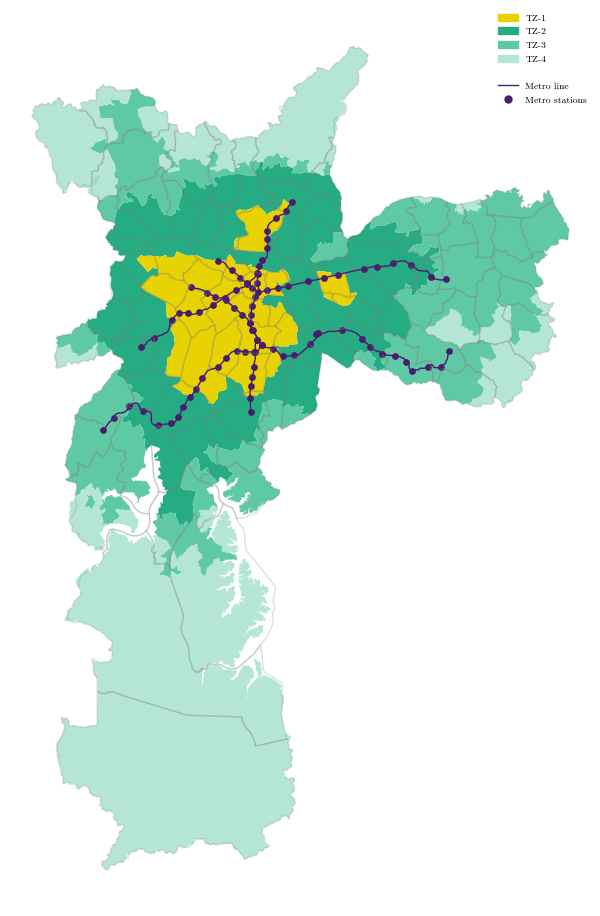

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import geopandas as gpd

# Your figure and initial plot
t = 1
fig, ax = plt.subplots(figsize=(10*t, 12*t))

# First GeoDataFrame with automatic legend
f = gpd_zona_fiscal.plot(column="zf_sigla_eng", legend=False, cmap=cmap_esmeralda_amarelo_c4, ax=ax)
# Second layer without legend
gpd_distritos.boundary.plot(color='grey', ax=f, alpha=.25)
# Metro lines & stations
df_metro_line.plot(ax=ax, color="#481C6E", linewidth=1.0, label="Metro line")
gdf_metro_open.plot(ax=ax, color="#481C6E", markersize=15, label="Metro stations")

patches = [
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[0], label='TZ-1'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[1], label='TZ-2'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[2], label='TZ-3'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[3], label='TZ-4'),
    mpatches.Patch(color='white', label=' '),
    mlines.Line2D([], [], color="#481C6E", linewidth=1.0, label="Metro line"),
    mlines.Line2D([], [], color="#481C6E", marker="o", linestyle="None",
                           markersize=5, label="Metro stations"),
]
ax.legend(handles=patches, loc='upper right')

# Background
ax.axis('off')
plt.savefig('figs/map_sp_zonas_fiscais.png')

#### DID

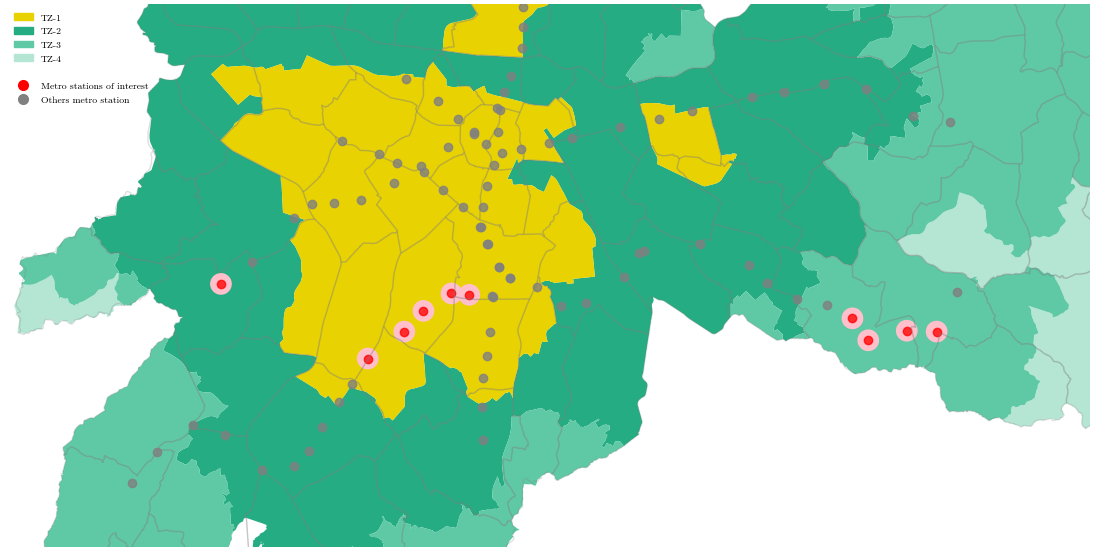

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import geopandas as gpd

# Your figure and initial plot
t = 1.4
fig, ax = plt.subplots(figsize=(10*t, 12*t))

# First GeoDataFrame with automatic legend
f = gpd_zona_fiscal.plot(column="zf_sigla_eng", legend=False, cmap=cmap_esmeralda_amarelo_c4, ax=ax)

# Second layer without legend
f = gpd_distritos.boundary.plot(color='grey', ax=f, alpha=.25)
b400_metro = gdf_metro_open[gdf_metro_open.entre_17e23].buffer(400)
f = b400_metro.plot(ax=f, color='pink')
f = gdf_metro_open[~gdf_metro_open['entre_17e23']].plot(ax=f, color='grey', alpha=.8)
f = gdf_metro_open[gdf_metro_open['entre_17e23']].plot(ax=f, color='red', alpha=.77)


patches = [
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[0], label='TZ-1'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[1], label='TZ-2'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[2], label='TZ-3'),
    mpatches.Patch(color=cmap_esmeralda_amarelo_c4.colors[3], label='TZ-4'),
    mpatches.Patch(color='white', label=' '),
    mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=7, label='Metro stations of interest'),
    mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=7, label='Others metro station'),
]
ax.legend(handles=patches, loc='upper left')

# Background
ax.axis('off')
f.set_xlim(left=315000 , right=355000)
f.set_ylim(top=7.400 * 10 **6 , bottom=7.3800 * 10 **6)
plt.savefig('figs/map_sp_zonas_fiscais.png')
plt.show()

### IPTU

In [ ]:
gdf_metro_open_iptu = catalog.load("metro_final")

# remover largo treze e pinheiros
ls_central = [
# lilas
#     'Adolfo Pinheiro',
    'AACD-Servidor',
    'Alto da Boa Vista',
    'Borba Gato', 
    'Brooklin', 
    'Campo Belo',
    'Moema',
    'Eucaliptos',
    'Hospital São Paulo',
#     amarela
    'Faria Lima',
    'Fradique Coutinho',
    'Oscar Freire',
    'Higienópolis–Mackenzie',
#     verde
    'Vila Madalena',
    'Sumaré',
    'Chácara Klabin',
]
ls_perif = [
# 
#     'Butantã',
    'Vila Sônia',
#     'São Paulo-Morumbi',
#  azul
    'Tucuruvi',
    'Parada Inglesa',
#     'Jardim São Paulo',
#     verde
    'Alto do Ipiranga',
#     'Chácara Klabin',
    'Sacomã',
#     'Santos-Imigrantes',
    'Tamanduateí',
    'Vila Prudente',
#     Lilas
    'Campo Limpo',
    'Capão Redondo',
    'Giovanni Gronchi',
#     'Largo Treze',
    'Santo Amaro',
    'Vila das Belezas',
#     'Adolfo Pinheiro',
#     'Alto da Boa Vista',
    # prata
    'Camilo Haddad',
    'Fazenda da Juta',
    'Jardim Colonial',
    'Jardim Planalto',
    'Oratório',
    'Sapopemba',
    'São Lucas',
    'São Mateus',
    'Vila Tolstói',
    'Vila União',
]



gdf_metro_open_iptu['elegivel'] = gdf_metro_open_iptu['Inauguração'].where(
    gdf_metro_open_iptu['Inauguração'].dt.year.between(1995, 2025), 0
).astype(bool).astype(int)

gdf_metro_open_iptu = gdf_metro_open_iptu[
    ~ (
        (gdf_metro_open_iptu['Nome'] == 'Vila Prudente') & (gdf_metro_open_iptu['Inauguração'].dt.year == 2014)
        | (gdf_metro_open_iptu['Nome'] == 'Chácara Klabin') & (gdf_metro_open_iptu['Inauguração'].dt.year  == 2018)
    )
]

2025-09-13 23:07:33,362 - kedro.io.data_catalog - INFO - Loading data from `metro_final` (GeoJSONDataSet)...


In [31]:
gdf_metro_open_iptu['centro'] = (gdf_metro_open_iptu.Nome.isin(ls_central)).astype(int)
gdf_metro_open_iptu['perif'] = (gdf_metro_open_iptu.Nome.isin(ls_perif)).astype(int)

In [34]:
from matplotlib import patheffects as pe


def make_elsevier_map(filename_base: str = "Fig1_map", dpi: int = 500):
    """Create both PDF (vector) and LZW‑compressed TIFF (raster) files."""
    with elsevier_figure(dpi=dpi) as (fig, ax):
        # 1) Quadras coloured by Central / Peripheral groups
        df_quadras_results.plot(
            column="ds_groups",
            cmap=cmap_esmeralda_amarelo_c2,
            linewidth=0,
            ax=ax,
            legend=False,
            zorder=1,
        )

        # 2) District boundaries for context
        gpd_distritos.boundary.plot(
            color="grey",
            linewidth=0.4,
            alpha=0.5,
            ax=ax,
            zorder=2,
        )

        # 3) Metro stations – neutral fill, shape carries the class
        station_fill = "#F4A6D7"  # soft pink, neutral against green/yellow
        outline_kwargs = dict(edgecolor="black", linewidth=0.2, markersize=30, zorder=3)

        # Central‑interest – triangle ▲
        gdf_metro_open_iptu[gdf_metro_open_iptu["centro"] == 1].plot(
            ax=ax,
            color=station_fill,
            marker="^",
            label="Metro – Central",
            **outline_kwargs,
        )

        # Peripheral‑interest – diamond ◆
        gdf_metro_open_iptu[gdf_metro_open_iptu["perif"] == 1].plot(
            ax=ax,
            color=station_fill,
            marker="D",
            label="Metro – Peripheral",
            **outline_kwargs,
        )

        # Other stations – grey ●
        gdf_metro_open_iptu[(gdf_metro_open_iptu[["perif", "centro"]].sum(axis=1) == 0)].plot(
            ax=ax,
            color="grey",
            marker="o",
            label="Other metro",
            **outline_kwargs,
        )

        # 4. Legend (all patches and marker examples already outlined)
        legend_handles = [
            mpatches.Patch(color=cmap_esmeralda_amarelo_c2.colors[0], label="Central Group"),
            mpatches.Patch(color=cmap_esmeralda_amarelo_c2.colors[1], label="Peripheral Group"),
            mlines.Line2D([], [], marker="^", linestyle="None", markerfacecolor=station_fill,
                          markeredgecolor="black", markeredgewidth=0.4, markersize=5,
                          label="Metro - Central"),
            mlines.Line2D([], [], marker="D", linestyle="None", markerfacecolor=station_fill,
                          markeredgecolor="black", markeredgewidth=0.4, markersize=5,
                          label="Metro - Peripheral"),
            mlines.Line2D([], [], marker="o", linestyle="None", markerfacecolor="grey",
                          markeredgecolor="black", markeredgewidth=0.4, markersize=5,
                          label="Other metro"),
        ]
        ax.legend(handles=legend_handles,
              loc="lower right",
              frameon=False,
              fontsize=6,
#               borderpad=0.3
        )

        # 5. Spatial extent and decoration
        ax.set_xlim(315_000, 355_000)
        ax.set_ylim(7.3800e6, 7.4050e6)
        ax.axis("off")

        # --- Export ---
        fig.savefig(f"figs/{filename_base}.tif", bbox_inches="tight", format="tiff",
                    dpi=dpi, pil_kwargs={"compression": "tiff_lzw"})

make_elsevier_map('mpdid-map')